### 2.4.2 Xử lí Outlier

KeyboardInterrupt: 

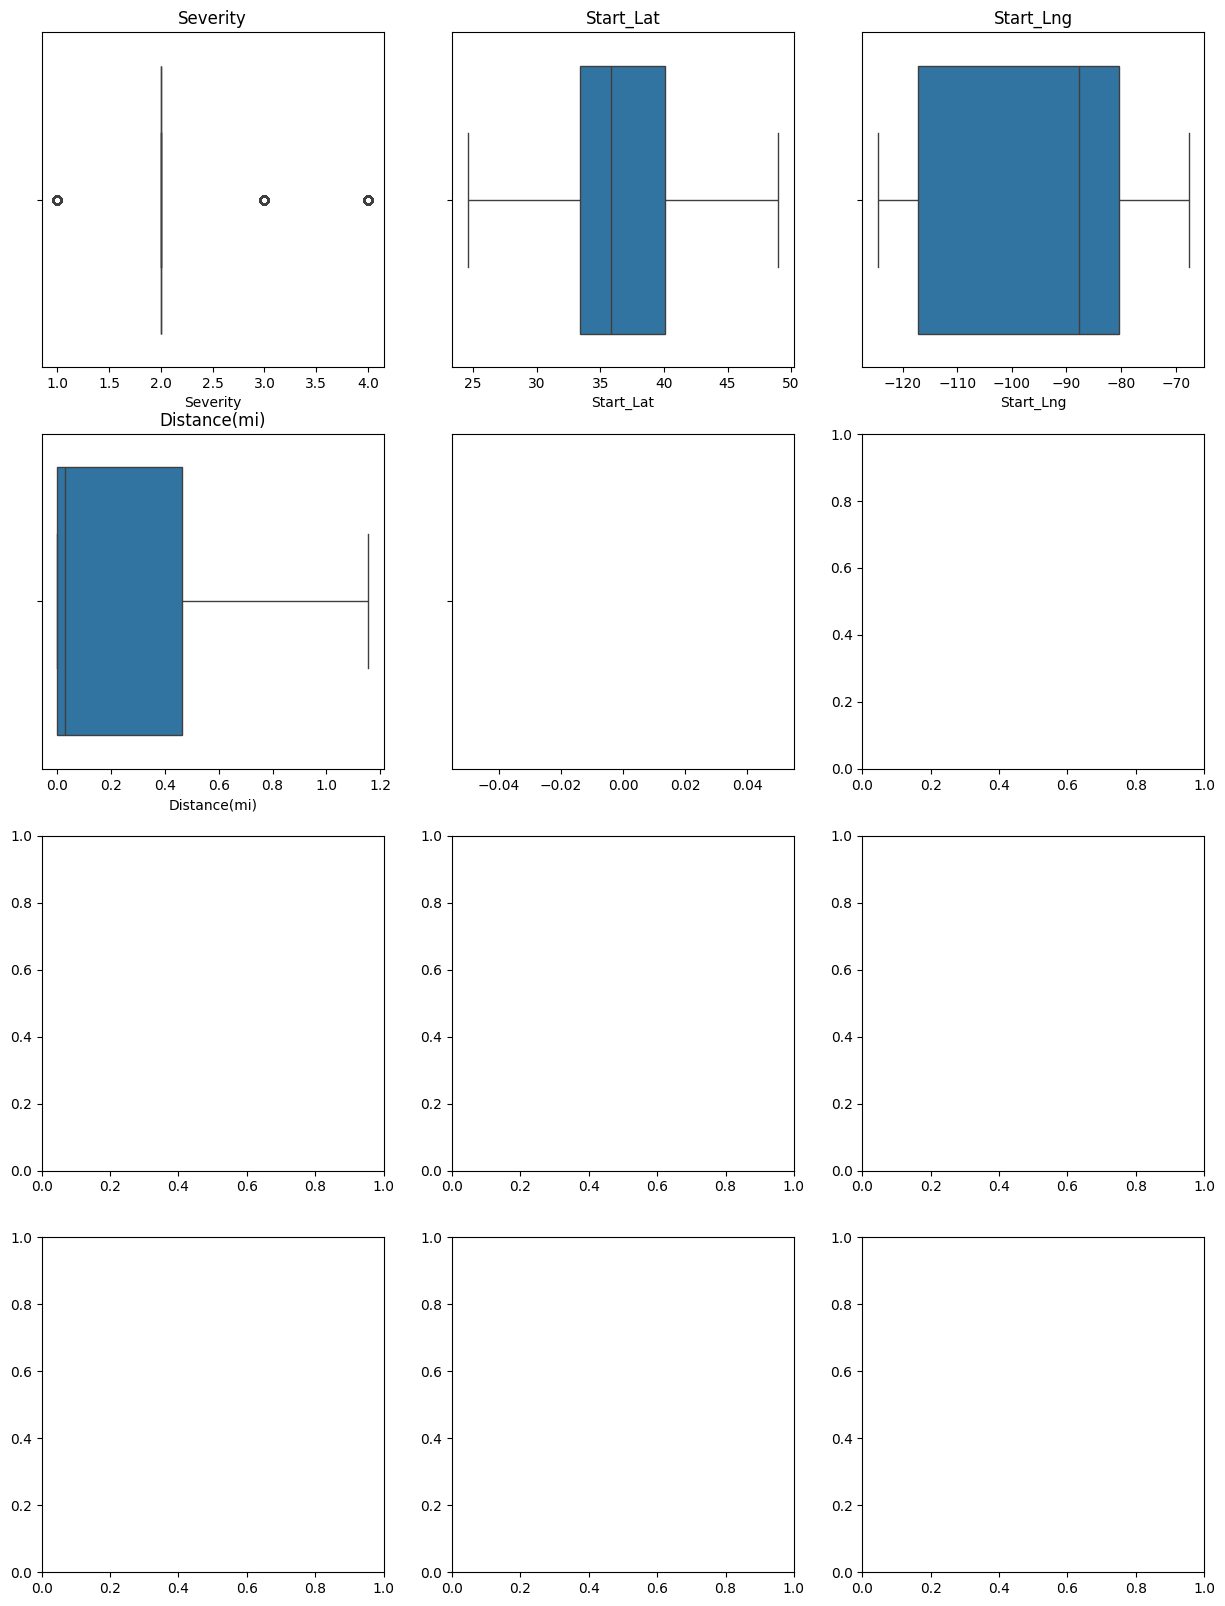

In [ ]:
num_cols = 3
num_rows = (len(numerical_cols) - 1) // num_cols + 1

# Tạo figure và axes cho boxplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Lặp qua các cột số để vẽ boxplot
for i, col in enumerate(numerical_cols):
    row = i // num_cols
    col_name = col  # Lưu tên cột
    col = i % num_cols
    sns.boxplot(x=df[col_name], ax=axes[row, col]) 
    axes[row, col].set_title(col_name)  

# Xóa các axes dư thừa nếu có
for i in range(len(numerical_cols), num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

- Cột `Severity` thể hiện mức độ nghiêm trọng, có giá trị từ 1 - 4 nên chúng ta không cần xử lí outlier. 
- Các cột còn lại xử lí outlier bằng IQR.

In [ ]:

col_with_outliers = [col for col in numerical_cols if col != 'Severity']

def handle_outlier(col_to_handle: list, df):
    for col in col_to_handle:

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        

        IQR = Q3 - Q1
        
        # tính khoảng 1.5 IQR
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with values based on IQR
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return df


df = handle_outlier(col_with_outliers, df)

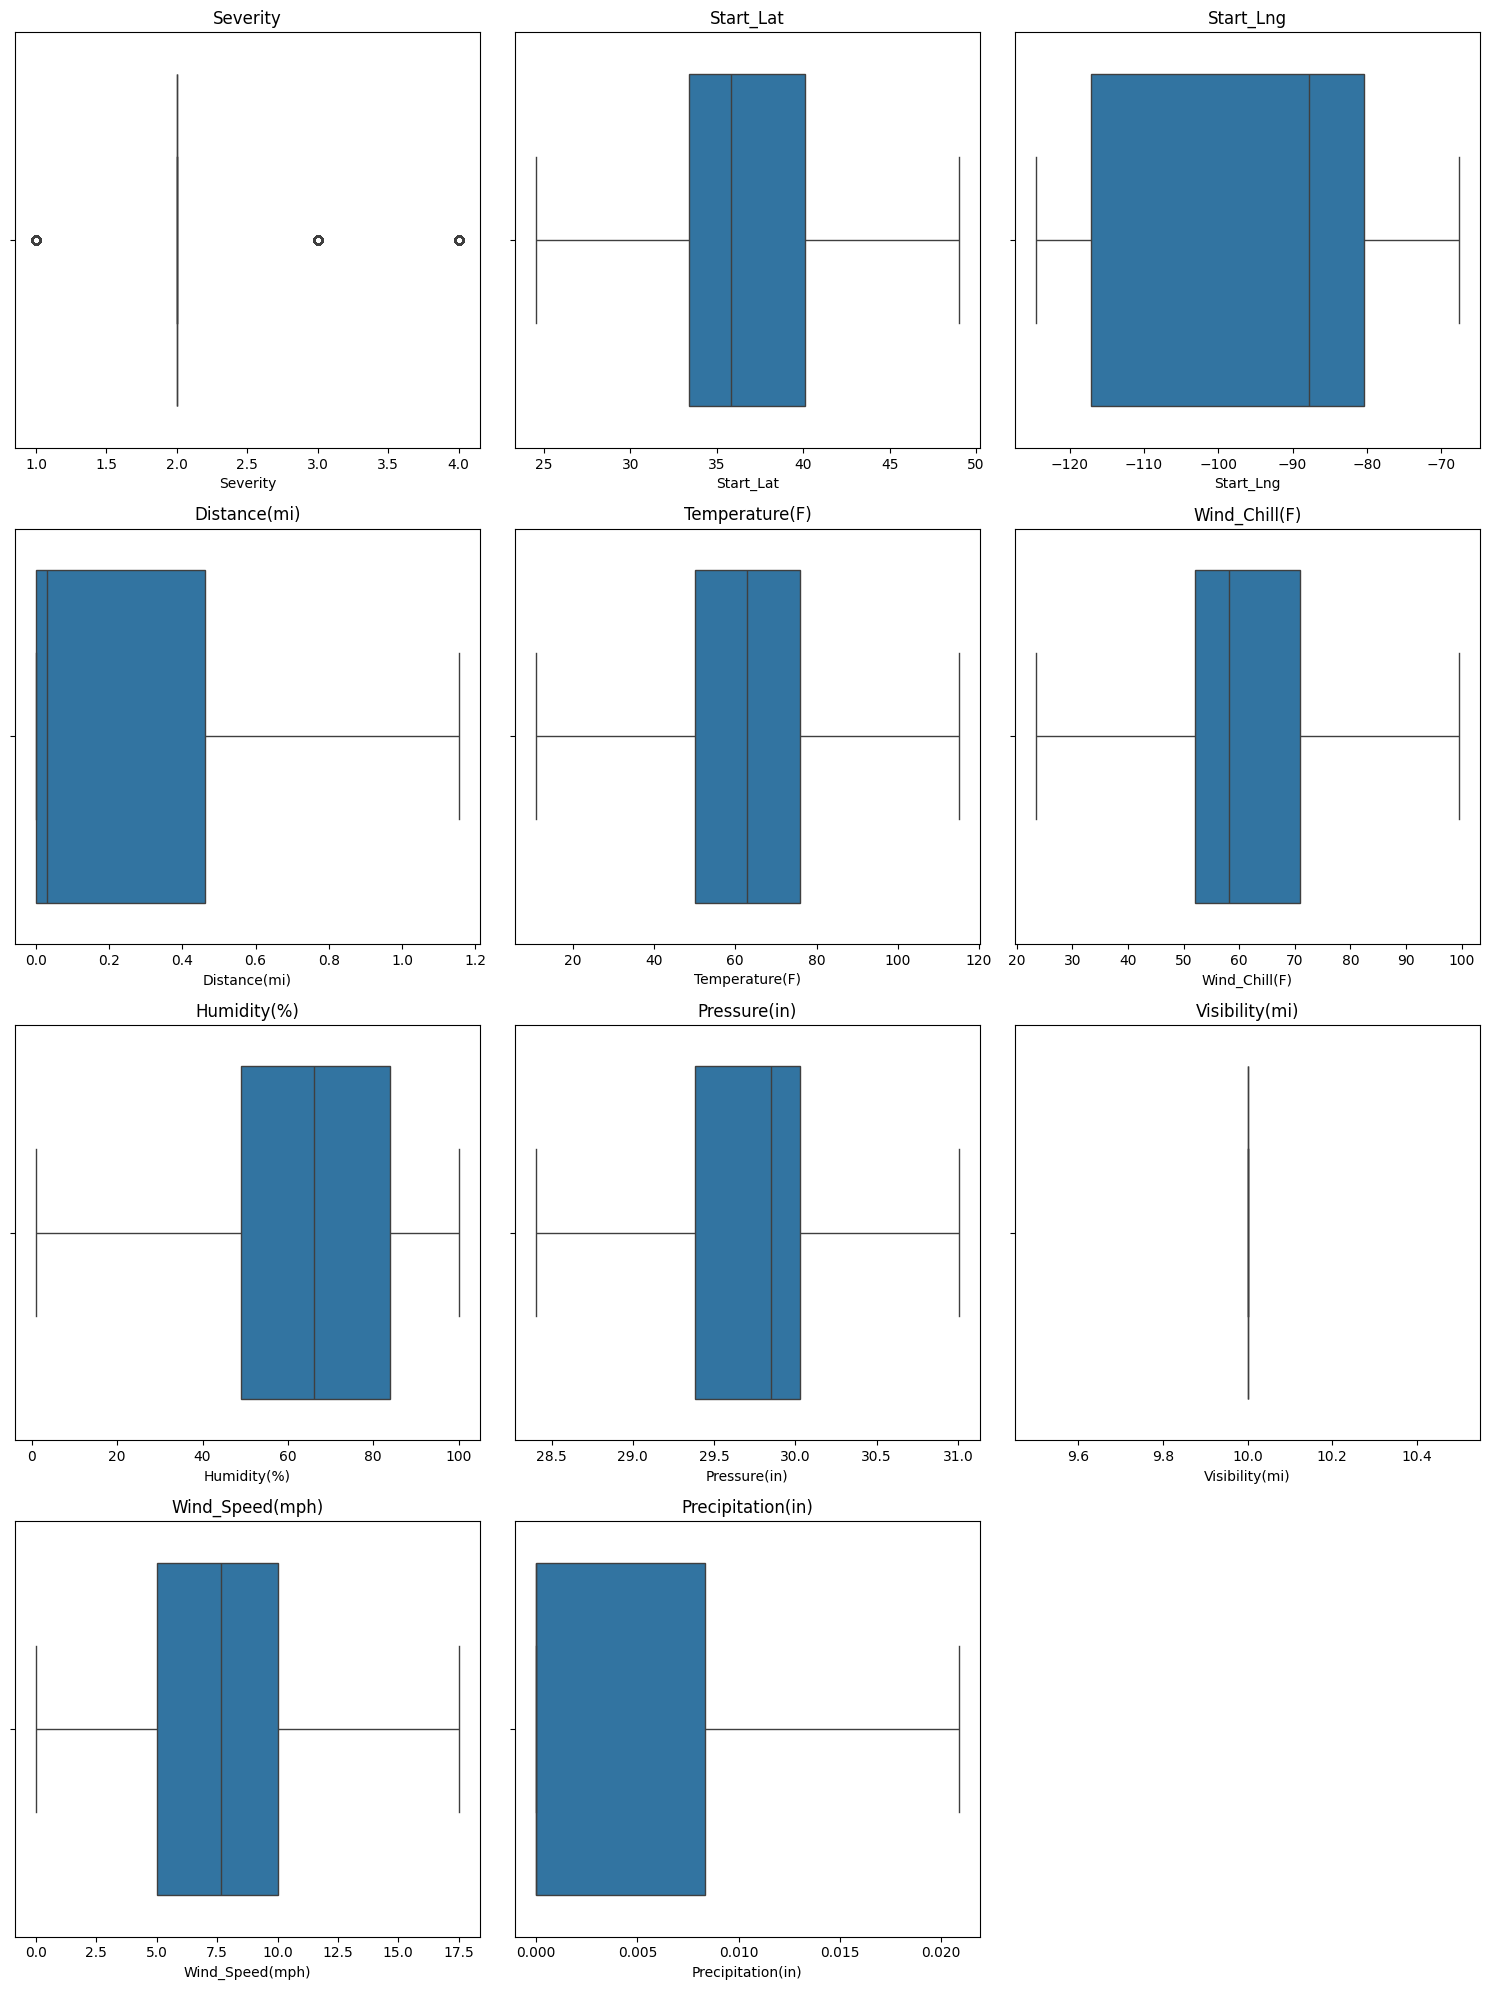

In [ ]:
num_cols = 3
num_rows = (len(numerical_cols) - 1) // num_cols + 1

# Tạo figure và axes cho boxplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Lặp qua các cột số để vẽ boxplot
for i, col in enumerate(numerical_cols):
    row = i // num_cols
    col_name = col  # Lưu tên cột
    col = i % num_cols
    sns.boxplot(x=df[col_name], ax=axes[row, col]) 
    axes[row, col].set_title(col_name)  

# Xóa các axes dư thừa nếu có
for i in range(len(numerical_cols), num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()